# Câu hỏi: Dựa vào mô tả về mức độ đọc, thì có thể phân loại các mức độ như thế nào cho từng nhóm điểm?

In [112]:
import pyarrow.parquet as pa
table = pa.read_table('metadata_en.parquet')

In [113]:
import pandas as pd
import numpy as np
df = table.to_pandas()
df.head()

,title,creator,birthdate,deathdate,publisher,issued,rights,language,subjects,description,Index
1,The Master Spirit,"Magnay, William, Sir",1855,1917,Project Gutenberg,2022-03-25,Public domain in the USA.,en,"[London (England) -- Fiction, Love stories, Ad...",[Reading ease score: 71.3 (7th grade). Fairly ...,67703
2,The Family on Wheels,"Oxley, J. Macdonald (James Macdonald)",1855,1907,Project Gutenberg,2017-11-05,Public domain in the USA.,en,"[Orphans -- Juvenile fiction, Siblings -- Juve...",[Reading ease score: 77.9 (7th grade). Fairly ...,55891
3,Three Good Giants\nWhose Ancient Deeds are rec...,"Rabelais, François",1835,1901,Project Gutenberg,2019-04-09,Public domain in the USA.,en,"[Fantasy fiction, Conduct of life -- Juvenile ...",[Reading ease score: 76.2 (7th grade). Fairly ...,59235
4,Drake's Road Book of the Grand Junction Railwa...,"Drake, James, active 1825",None,None,Project Gutenberg,2013-07-31,Public domain in the USA.,en,[Grand Junction Railway Company (Great Britain...,[Reading ease score: 65.5 (8th & 9th grade). N...,43367
5,Facts and Speculations on the Origin and Histo...,"Chatto, William Andrew",1799,1864,Project Gutenberg,2014-05-04,Public domain in the USA.,en,"[Playing cards -- History, GV]",[Reading ease score: 62.7 (8th & 9th grade). N...,45584


In [114]:
import re

# Regular expression to extract the score and bracket content
pattern = r'Reading ease score:\s([\d.]+)\s\((.*?)\)\.\s(.*)'

score_list = []
grade_list = []
level_list = []
temp = df.copy()
for i in range(len(temp)):
  list_texts = temp.iloc[i]['description']
  if list_texts is not None:
    for text in list_texts:
      match = re.search(pattern, text)
      if match:
        score = match.group(1)  # Extract the reading ease score
        bracket_content = match.group(2)
        level = match.group(3)  # Extract text after the bracket
        score_list.append(score)
        grade_list.append(bracket_content)
        level_list.append(level)

In [132]:
description = pd.DataFrame({
    'score': score_list,
    'grade': grade_list,
    'level': level_list
})

In [116]:
description.head(20)

,score,grade,level
0,71.3,7th grade,Fairly easy to read.
1,77.9,7th grade,Fairly easy to read.
2,76.2,7th grade,Fairly easy to read.
3,65.5,8th & 9th grade,Neither easy nor difficult to read.
4,62.7,8th & 9th grade,Neither easy nor difficult to read.
5,72.8,7th grade,Fairly easy to read.
6,84.1,6th grade,Easy to read.
7,80.3,6th grade,Easy to read.
8,63.7,8th & 9th grade,Neither easy nor difficult to read.
9,68.7,8th & 9th grade,Neither easy nor difficult to read.


In [117]:
description.loc[53]

score                  90.9
grade             5th grade
level    Very easy to read.
Name: 53, dtype: object

In [118]:
description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58157 entries, 0 to 58156
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   score   58157 non-null  object
 1   grade   58157 non-null  object
 2   level   58157 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


In [119]:
description['grade'].unique()

array(['7th grade', '8th & 9th grade', '6th grade', 'College-level',
       '10th to 12th grade', '5th grade', 'College graduate level',
       'Professional level'], dtype=object)

In [120]:
description['level'].unique()

array(['Fairly easy to read.', 'Neither easy nor difficult to read.',
       'Easy to read.', 'Difficult to read.',
       'Somewhat difficult to read.', 'Very easy to read.',
       'Very difficult to read.', 'Extremely difficult to read.'],
      dtype=object)

In [133]:
description['score'] = description['score'].astype(float)

In [134]:
for i in range(len(description)): #chỉnh format .0 với .5
  description.loc[i, "score"] = round(description.loc[i, "score"] * 2) / 2

In [135]:
description['level'] = description['level'].map({
    'Fairly easy to read.': 'Easy',
    'Easy to read.': 'Easy',
    'Very easy to read': 'Easy',
    'Fairly difficult to read.': 'Difficult',
    'Difficult to read.': 'Difficult',
    'Somewhat difficult to read.': 'Difficult',
    'Very difficult to read.': 'Difficult',
    'Extremely difficult to read.': 'Difficult',
    'Neither easy nor difficult to read.': 'Moderate'

})

In [136]:
description['level'].isna().sum()

1606

In [137]:
description[pd.isnull(description['level'])]

,score,grade,level
53,91.0,5th grade,NaN
67,91.5,5th grade,NaN
87,95.5,5th grade,NaN
96,93.0,5th grade,NaN
131,93.0,5th grade,NaN
...,...,...,...
57738,92.5,5th grade,NaN
58032,91.5,5th grade,NaN
58117,91.0,5th grade,NaN
58127,90.0,5th grade,NaN


In [138]:
for i in range(len(description)):
    if pd.isnull(description['level'][i]) == True:
        description.loc[i, 'level'] = 'Unknown'

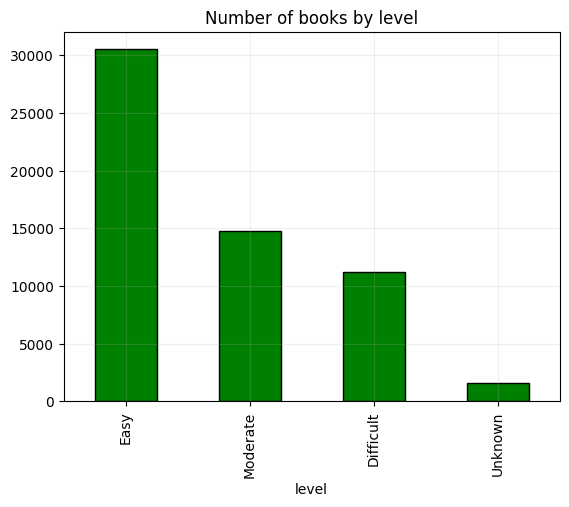

In [139]:
import matplotlib.pyplot as plt

description['level'].value_counts().plot(kind='bar', color='green', edgecolor='black', title="Number of books by level")
plt.grid(alpha=0.2)

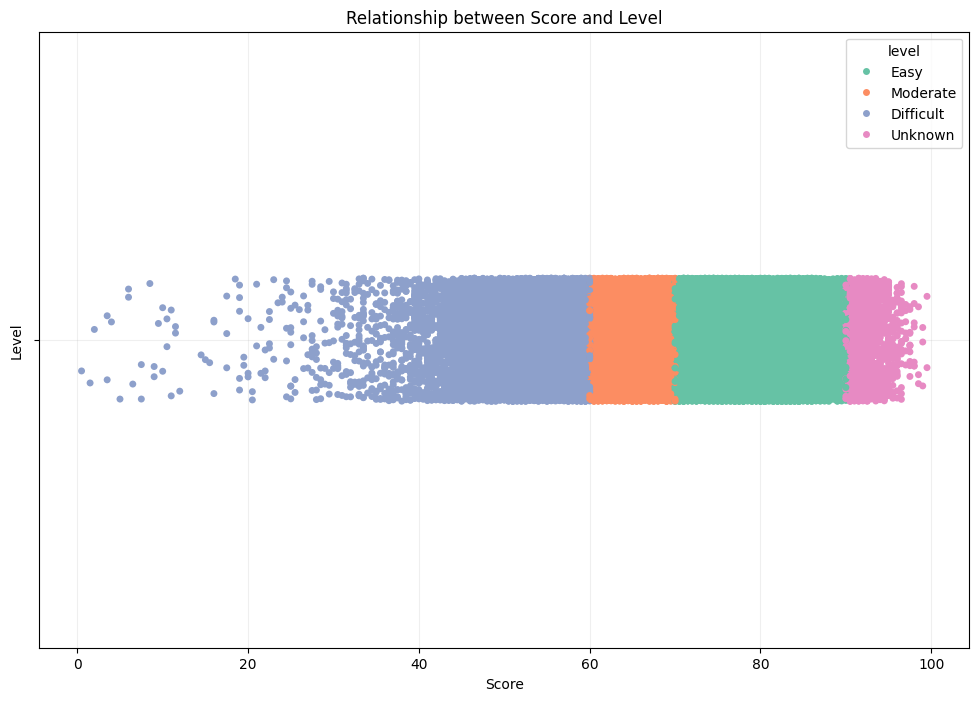

In [161]:
import seaborn as sns

plt.figure(figsize=(12, 8))
temp = description.dropna().copy()
sns.stripplot(data=temp, x=temp['score'], hue=temp['level'], palette='Set2')
plt.xlabel('Score')
plt.ylabel('Level')
# plt.legend('Level')
plt.title('Relationship between Score and Level')
plt.grid(alpha=0.2)
plt.show()

In [156]:
# Compute score ranges for each class
class_ranges = temp.groupby('level')['score'].agg(['min', 'max']).sort_values('min')
print("Class Ranges:\n", class_ranges)

# Compute boundaries between classes
boundaries = []
previous_max = None

for idx, row in class_ranges.iterrows():
    if previous_max is not None:
        # Boundary is the midpoint between the previous max and the current min
        boundary = (previous_max + row['min']) / 2
        boundaries.append(boundary)
    previous_max = row['max']

print("Computed Boundaries:", boundaries)


Class Ranges:
         min   max
level            
0       0.5  60.0
2      60.0  70.0
1      70.0  90.0
3      90.0  99.5
Computed Boundaries: [60.0, 70.0, 90.0]


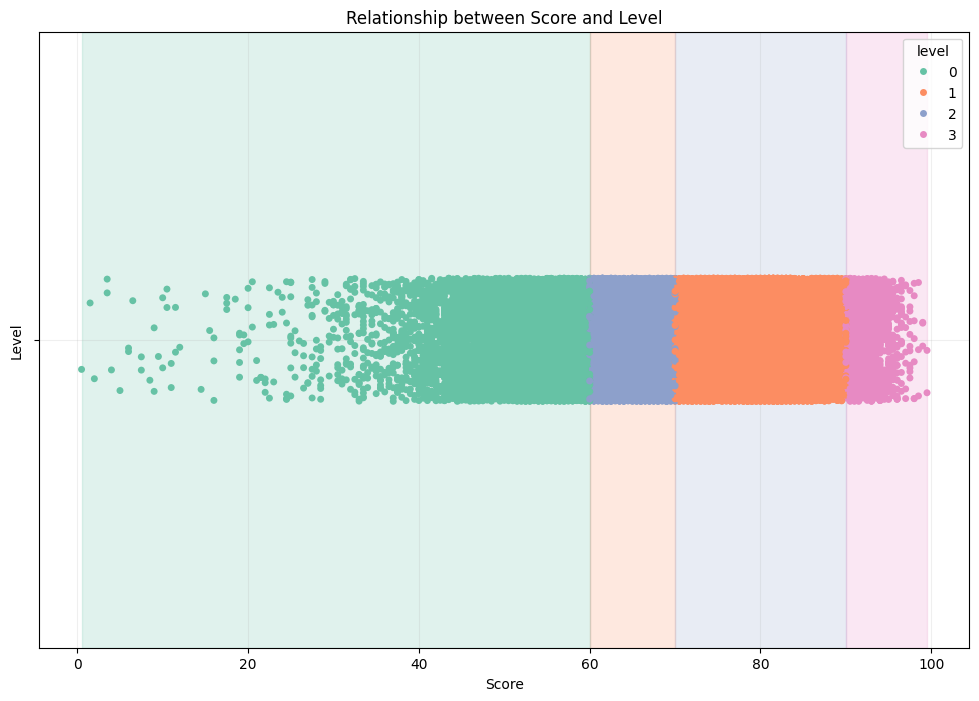

In [159]:
# Plot
plt.figure(figsize=(12, 8))
sns.stripplot(data=temp, x=temp['score'], hue=temp['level'], palette='Set2')
plt.xlabel('Score')
plt.ylabel('Level')
plt.title('Relationship between Score and Level')

colors = sns.color_palette("Set2", len(class_ranges))

# Add shaded regions between boundaries
start = class_ranges['min'].iloc[0]  # Start of the first class range
for i, boundary in enumerate(boundaries + [class_ranges['max'].iloc[-1]]):  # Include the last max as an endpoint
    plt.axvspan(start, boundary, color=colors[i], alpha=0.2)  # Add translucent shading
    start = boundary  # Update start for the next region

plt.grid(alpha=0.2)
plt.show()


Ranh giới khá rõ ràng, có thể thấy biên giữa `Easy` và `Moderate` là 60 điểm, còn biên giữa `Moderate` và `Difficult` là 70 điểm.

# Data Model (Optional)

In [143]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = temp.select_dtypes(include=['object', 'category']).columns.tolist()

# Tạo encoder
encoder = LabelEncoder()

# Với mỗi cột có dữ liệu dạng categorical, ta tiến hành label encoding. 
# Nếu là cột target ta làm thêm một bước để lưu lại cách mapping từ tên -> số để tiện về sau
number_to_classname = {}
for column in categorical_columns:
    temp[column] = encoder.fit_transform(temp[column])
    if column == 'level':
        number_to_classname = dict(zip(encoder.transform(encoder.classes_), encoder.classes_))

In [144]:
number_to_classname

{0: 'Difficult', 1: 'Easy', 2: 'Moderate', 3: 'Unknown'}

<Axes: >

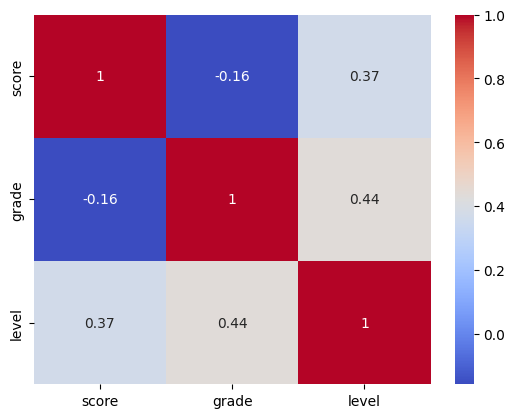

In [155]:
sns.heatmap(temp.corr(), annot=True, cmap='coolwarm')

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score


X = temp.drop(columns=["level"])
y = temp["level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# scaler = StandardScaler()
# X_train["score"] = scaler.fit_transform(X_train[["score"]])
# X_test["score"] = scaler.transform(X_test[["score"]])

# print(X_train, X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3399
           1       1.00      1.00      1.00      9160
           2       1.00      1.00      1.00      4419
           3       1.00      1.00      1.00       470

    accuracy                           1.00     17448
   macro avg       1.00      1.00      1.00     17448
weighted avg       1.00      1.00      1.00     17448



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [151]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Evaluate the model
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9950710683172856

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3399
           1       1.00      1.00      1.00      9160
           2       1.00      0.98      0.99      4419
           3       1.00      1.00      1.00       470

    accuracy                           1.00     17448
   macro avg       0.99      1.00      0.99     17448
weighted avg       1.00      1.00      1.00     17448



Random Forest Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2231
           1       1.00      1.00      1.00      6111
           2       1.00      1.00      1.00      2973
           3       1.00      1.00      1.00       317

    accuracy                           1.00     11632
   macro avg       1.00      1.00      1.00     11632
weighted avg       1.00      1.00      1.00     11632



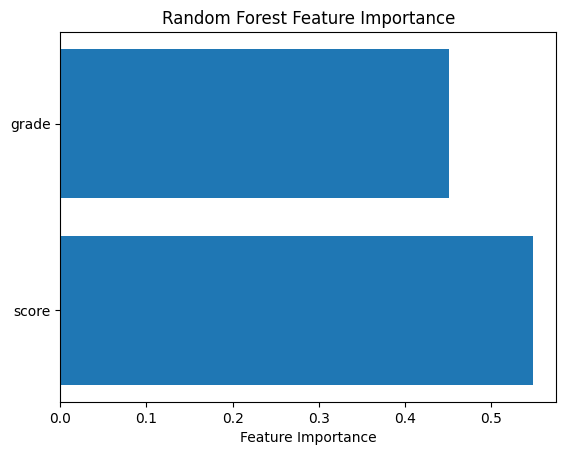

In [147]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Feature Importance
import matplotlib.pyplot as plt

importances = rf.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()